In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


C:\Users\manga\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('orderbook_snapshot.csv',header=None)

In [5]:
df = df.drop([1],axis=1)

In [6]:
df = df.rename(columns={0: "timestamp", 2: "price", 3: 'volume', 4:'depth'})

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp_epoch'] = df['timestamp'].astype('int64') // 10**9

In [50]:
def set_overflow(df,feature,overflow):
    return df.loc[df[feature]>overflow] = overflow

In [49]:
initdf = df

In [7]:
order_book = df

In [2]:
# trading intensity
order_book = pd.read_csv('orderbook_snapshot.csv',header=None)
order_book = order_book.drop([1],axis=1)
order_book = order_book.rename(columns={0: "timestamp", 2: "price", 3: 'volume', 4:'depth'})

best_asks = order_book[(order_book['depth'] == '0_ask')]
best_bids = order_book[(order_book['depth'] == '0_bid')]

mid_prices = pd.merge(best_asks, best_bids, on='timestamp', suffixes=('_ask', '_bid'))
mid_prices['mid_price'] = (mid_prices['price_ask'] + mid_prices['price_bid']) / 2

order_book = pd.merge(order_book, mid_prices[['timestamp', 'mid_price']], on='timestamp', how='left')

order_book['Diff_From_Mid_in_Ticks'] = (order_book['price'] - order_book['mid_price']) / 0.1

order_book['executed'] = False

for i in range(len(order_book)-1):
    print(i)
    current_time = order_book.iloc[i]['timestamp']
    next_time = order_book.iloc[i + 1]['timestamp']
    next_asks = order_book[(order_book['timestamp'] == next_time) & (order_book['depth'].str.contains('ask'))]
    next_bids = order_book[(order_book['timestamp'] == next_time) & (order_book['depth'].str.contains('bid'))]
    
    if not next_asks.empty and not next_bids.empty:
        print('traded')
        best_next_ask = next_asks['price'].min()
        best_next_bid = next_bids['price'].max()

        order_book.loc[(df_t3['timestamp'] == current_time) & (order_book['depth'].str.contains('bid')) & (order_book['price'] >= best_next_ask), 'executed'] = True
        order_book.loc[(df_t3['timestamp'] == current_time) & (order_book['depth'].str.contains('ask')) & (order_book['price'] <= best_next_bid), 'executed'] = True

        



ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [9]:
order_book

,timestamp,price,volume,depth
0,2024-02-07 09:00:00,2367.3,2.039410,49_ask
1,2024-02-07 09:00:00,2367.2,0.000635,48_ask
2,2024-02-07 09:00:00,2367.1,1.622500,47_ask
3,2024-02-07 09:00:00,2366.9,143.771058,46_ask
4,2024-02-07 09:00:00,2366.8,2.063600,45_ask
...,...,...,...,...
7825195,2024-02-08 09:00:00,2417.4,20.637439,45_bid
7825196,2024-02-08 09:00:00,2417.1,62.057591,46_bid
7825197,2024-02-08 09:00:00,2417.0,0.008275,47_bid
7825198,2024-02-08 09:00:00,2416.9,2.332576,48_bid


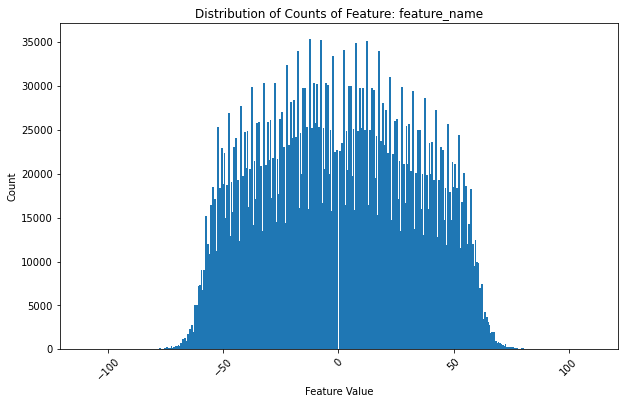

In [144]:
counts = order_book['Diff_From_Mid_in_Ticks'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.title('Distribution of Counts of Feature')
plt.show()

In [115]:
#order_book.sort_values(by='timestamp', inplace=True)

# Add a column to mark executed orders
df_t3['executed'] = False

# Iterate through each timestep, except the last one
for i in range(100):
    print(i)
    current_time = df_t3.iloc[i]['timestamp']
    next_time = df_t3.iloc[i + 1]['timestamp']
    next_asks = df_t3[(df_t3['timestamp'] == next_time) & (df_t3['depth'].str.contains('ask'))]
    next_bids = df_t3[(df_t3['timestamp'] == next_time) & (df_t3['depth'].str.contains('bid'))]
    
    if not next_asks.empty and not next_bids.empty:
        print('traded')
        best_next_ask = next_asks['price'].min()
        best_next_bid = next_bids['price'].max()

        df_t3.loc[(df_t3['timestamp'] == current_time) & (df_t3['depth'].str.contains('bid')) & (df_t3['price'] >= best_next_ask), 'executed'] = True
        df_t3.loc[(df_t3['timestamp'] == current_time) & (df_t3['depth'].str.contains('ask')) & (df_t3['price'] <= best_next_bid), 'executed'] = True

# Display the DataFrame with the 'executed' column



C:\Users\manga\AppData\Local\Temp/ipykernel_82508/22138800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t3['executed'] = False


0
traded
1
traded
2
traded
3
traded
4
5
traded
6
traded
7
traded
8
traded
9
traded
10
11
traded
12
traded
13
traded
14
traded
15
traded
16
traded
17
traded
18
traded
19
traded
20
traded
21
traded
22
traded
23
traded
24
traded
25
traded
26
traded
27
traded
28
traded
29
traded
30
traded
31
traded
32
traded
33
traded
34
traded
35
traded
36
traded
37
traded
38
traded
39
traded
40
traded
41
traded
42
traded
43
traded
44
traded
45
traded
46
traded
47
traded
48
traded
49
traded
50
traded
51
traded
52
traded
53
traded
54
traded
55
traded
56
traded
57
traded
58
59
traded
60
traded
61
traded
62
traded
63
traded
64
65
traded
66
traded
67
traded
68
traded
69
traded
70
71
traded
72
traded
73
traded
74
traded
75
traded
76
77
traded
78
traded
79
traded
80
traded
81
traded
82
83
traded
84
traded
85
traded
86
traded
87
traded
88
traded
89
traded
90
traded
91
traded
92
traded
93
traded
94
traded
95
traded
96
traded
97
traded
98
traded
99
traded
                   timestamp   price     volume  depth  tim

In [145]:
best_asks = df_t3[(df_t3['depth'] == '0_ask')]
best_bids = df_t3[(df_t3['depth'] == '0_bid')]

mid_prices = pd.merge(best_asks, best_bids, on='timestamp', suffixes=('_ask', '_bid'))
mid_prices['mid_price'] = (mid_prices['price_ask'] + mid_prices['price_bid']) / 2

df_t3 = pd.merge(df_t3, mid_prices[['timestamp', 'mid_price']], on='timestamp', how='left')
df_t3['Diff_From_Mid_in_Ticks'] = (df_t3['price'] - df_t3['mid_price']) / 0.1


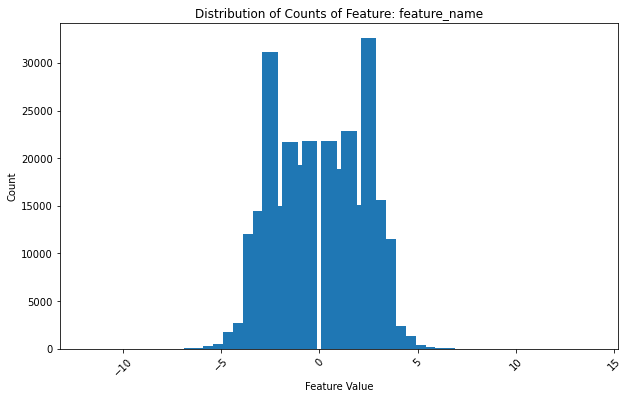

In [147]:
counts = df_t3['Diff_From_Mid_in_Ticks'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.title('Distribution of Counts of Feature: feature_name')
plt.xticks(rotation=45)  # Rotate labels to make them readable if necessary
plt.show()

In [112]:
#df_t3 = df[df['depth'] == '0_ask' | df['depth'] == '0_bid']
df_t3 = df[df['depth'].isin(['0_ask', '0_bid','1_ask', '1_bid','2_ask', '2_bid'])]
df_t3.loc[df_t3['volume']>22] = 22

In [11]:
best_asks = order_book[(order_book['depth'] == '0_ask')]
best_bids = order_book[(order_book['depth'] == '0_bid')]

In [13]:
bbid = best_bids.to_numpy()

array([[Timestamp('2024-02-07 09:00:00'), 2361.5, 2.17785634, '0_bid',
        1707296400],
       [Timestamp('2024-02-07 09:00:01'), 2361.5, 2.31383667, '0_bid',
        1707296401],
       [Timestamp('2024-02-07 09:00:02'), 2361.5, 2.18680396, '0_bid',
        1707296402],
       ...,
       [Timestamp('2024-02-08 08:59:58'), 2423.4, 1.55605682, '0_bid',
        1707382798],
       [Timestamp('2024-02-08 08:59:59'), 2423.4, 1.55605682, '0_bid',
        1707382799],
       [Timestamp('2024-02-08 09:00:00'), 2423.4, 1.55605682, '0_bid',
        1707382800]], dtype=object)

In [74]:
df_bids = df[df['depth'].str.contains('bid')]
df_asks = df[df['depth'].str.contains('ask')]

In [24]:
df_asks = df[df['depth'].str.endswith('_ask')].sort_values(by=['timestamp_epoch', 'price'], ascending=True)
df_bids = df[df['depth'].str.endswith('_bid')].sort_values(by=['timestamp_epoch', 'price'], ascending=False)

# Add a ranking for the top 3 within each timestamp for both asks and bids
df_asks['rank'] = df_asks.groupby('timestamp').cumcount() + 1
df_bids['rank'] = df_bids.groupby('timestamp').cumcount() + 1

# Filter to keep only the top 3
top_3_asks = df_asks[df_asks['rank'] <= 3]
top_3_bids = df_bids[df_bids['rank'] <= 3]

# Prepare for pivoting by setting unique column names for both price and volume
top_3_asks['ask_price_col'] = 'ask_price_' + top_3_asks['rank'].astype(str)
top_3_asks['ask_volume_col'] = 'ask_volume_' + top_3_asks['rank'].astype(str)
top_3_bids['bid_price_col'] = 'bid_price_' + top_3_bids['rank'].astype(str)
top_3_bids['bid_volume_col'] = 'bid_volume_' + top_3_bids['rank'].astype(str)

# Pivot for price and volume separately
asks_price_pivoted = top_3_asks.pivot(index='timestamp', columns='ask_price_col', values='price')
asks_volume_pivoted = top_3_asks.pivot(index='timestamp', columns='ask_volume_col', values='volume')
bids_price_pivoted = top_3_bids.pivot(index='timestamp', columns='bid_price_col', values='price')
bids_volume_pivoted = top_3_bids.pivot(index='timestamp', columns='bid_volume_col', values='volume')

# Merge the pivoted DataFrames
final_df = pd.concat([asks_price_pivoted, asks_volume_pivoted, bids_price_pivoted, bids_volume_pivoted], axis=1).reset_index()

# Ensure the DataFrame is sorted by timestamp
final_df.sort_values(by='timestamp', inplace=True)

C:\Users\manga\AppData\Local\Temp/ipykernel_58208/2169566155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_asks['ask_price_col'] = 'ask_price_' + top_3_asks['rank'].astype(str)
C:\Users\manga\AppData\Local\Temp/ipykernel_58208/2169566155.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_asks['ask_volume_col'] = 'ask_volume_' + top_3_asks['rank'].astype(str)
C:\Users\manga\AppData\Local\Temp/ipykernel_58208/2169566155.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [22]:
def process_depths(df, depth_type, asc):
    # Filter and sort in one step
    filtered_sorted = df[df['depth'].str.endswith(depth_type)].sort_values(by=['timestamp_epoch', 'price'], ascending=asc)
    
    # Directly get top 3 using groupby and head
    top_3 = filtered_sorted.groupby('timestamp_epoch').head(3)
    
    # Adding a rank column to keep track of the rank directly
    top_3['rank'] = top_3.groupby('timestamp_epoch').cumcount() + 1
    
    # Prepare for pivoting directly, simplifying column names
    top_3['price_col'] = top_3.apply(lambda x: f"{depth_type[:-4]}_price_{x['rank']}", axis=1)
    top_3['volume_col'] = top_3.apply(lambda x: f"{depth_type[:-4]}_volume_{x['rank']}", axis=1)
    
    # Separate dataframes for price and volume to avoid confusion in pivoting
    price_df = top_3.pivot(index='timestamp_epoch', columns='price_col', values='price')
    volume_df = top_3.pivot(index='timestamp_epoch', columns='volume_col', values='volume')
    
    return price_df, volume_df

# Process asks and bids
asks_price_df, asks_volume_df = process_depths(df, 'ask', True)
bids_price_df, bids_volume_df = process_depths(df, 'bid', False)

# Merge the pivoted DataFrames for price and volume separately and then together
final_df_price = pd.concat([asks_price_df, bids_price_df], axis=1)
final_df_volume = pd.concat([asks_volume_df, bids_volume_df], axis=1)

# Then, if needed, combine them into a single DataFrame for easier handling
final_df = pd.concat([final_df_price, final_df_volume], axis=1)

C:\Users\manga\AppData\Local\Temp/ipykernel_58208/702386570.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3['rank'] = top_3.groupby('timestamp_epoch').cumcount() + 1
C:\Users\manga\AppData\Local\Temp/ipykernel_58208/702386570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3['price_col'] = top_3.apply(lambda x: f"{depth_type[:-4]}_price_{x['rank']}", axis=1)
C:\Users\manga\AppData\Local\Temp/ipykernel_58208/702386570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [25]:
final_df

,timestamp,ask_price_1,ask_price_2,ask_price_3,ask_volume_1,ask_volume_2,ask_volume_3,bid_price_1,bid_price_2,bid_price_3,bid_volume_1,bid_volume_2,bid_volume_3
0,2024-02-07 09:00:00,2361.7,2361.8,2361.9,5.481337,8.665625,7.274197,2361.5,2361.4,2361.3,2.177856,8.548338,22.542875
1,2024-02-07 09:00:01,2361.7,2361.8,2361.9,7.736016,7.265626,6.687807,2361.5,2361.4,2361.3,2.313837,8.285548,22.081899
2,2024-02-07 09:00:02,2361.7,2361.8,2361.9,7.608983,7.952527,6.975755,2361.5,2361.4,2361.3,2.186804,8.573163,20.865354
3,2024-02-07 09:00:03,2361.7,2361.8,2361.9,7.786778,7.562826,6.959131,2361.5,2361.4,2361.3,2.313841,8.575175,20.837284
4,2024-02-07 09:00:04,2361.7,2361.8,2361.9,7.913811,7.725895,6.687807,2361.5,2361.4,2361.3,2.313841,8.565733,20.838050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78247,2024-02-08 08:59:56,2423.5,2423.6,2423.7,0.758475,15.132835,4.562662,2423.4,2423.3,2423.2,1.556057,2.897759,7.499100
78248,2024-02-08 08:59:57,2423.5,2423.6,2423.7,0.392084,15.132835,4.553132,2423.4,2423.3,2423.2,1.556057,3.194855,7.202004
78249,2024-02-08 08:59:58,2423.5,2423.6,2423.7,0.302943,15.009045,4.693471,2423.4,2423.3,2423.2,1.556057,4.625373,7.202004
78250,2024-02-08 08:59:59,2423.5,2423.6,2423.7,0.273528,15.009045,4.693980,2423.4,2423.3,2423.2,1.556057,3.749622,7.202004


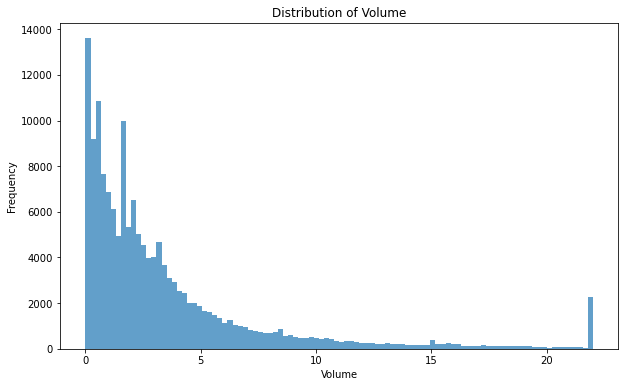

In [72]:
plt.figure(figsize=(10, 6)) 
plt.hist(df_t3['volume'], bins=100, alpha=0.7)  
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

In [140]:
def linear_regression(x, y):
    sx = np.sum(x)
    sy = np.sum(y)
    sx2 = np.sum(x ** 2)
    sxy = np.sum(x * y)
    w = len(x)
    slope = (w * sxy - sx * sy) / (w * sx2 - sx**2)
    intercept = (sy - slope * sx) / w
    return slope, intercept

In [ ]:
y = np.log(lambda_)
k_, logA = linear_regression(ticks, y)
A = np.exp(logA)
k = -k_

In [112]:
def compute_coeff(xi, gamma, delta, A, k):
    inv_k = np.divide(1, k)
    #c1 = 1 / (xi * delta) * np.log(1 + xi * delta * inv_k)
    c1 = np.log(1 + xi * delta * inv_k) / (xi * delta) 
    c2 = np.sqrt(np.divide(gamma, 2 * A * delta * k) * ((1 + xi * delta * inv_k) ** (k / (xi * delta) + 1)))
    return c1, c2


In [113]:
gamma = 0.05
delta = 1
A = 10
k= 0.4
vol = 10
order_qty = 10
adj1 = 1
adj2 = 0.05
pos = 1

c1, c2 = compute_coeff(gamma, gamma, delta, A, k)
half_spread = (c1 + delta / 2 * c2 * vol) * adj1
skew = c2 * vol * adj2

print(c1,c2,half_spread,skew)

final_df['mid_price_tick'] = (final_df['ask_price_1'] + final_df['bid_price_1']) / 2
final_df['bid_depth'] = half_spread + skew * pos
final_df['ask_depth'] = half_spread - skew * pos

#df['new_bid_price'] = np.minimum(np.round(df['mid_price_tick'] - df['bid_depth']), df['bid_price_1'])
#df['new_ask_price'] = np.maximum(np.round(df['mid_price_tick'] + df['ask_depth']), df['ask_price_1'])
final_df['new_bid_price'] = final_df['mid_price_tick'] - final_df['bid_depth']
final_df['new_ask_price'] = final_df['mid_price_tick'] + final_df['ask_depth']



# bid_depth = half_spread + skew * pos
# ask_depth = half_spread - skew * pos
# bid_price = min(np.round(mid_price_tick - bid_depth), hbt.best_bid_tick) 
# ask_price = max(np.round(mid_price_tick + ask_depth), hbt.best_ask_tick) 

2.355660713127669 0.13431557007180286 3.027238563486683 0.06715778503590143


In [135]:
final_df['mid_price_tick'] = (final_df['ask_price_1'] + final_df['bid_price_1']) / 2
final_df['bid_depth'] = half_spread + skew * pos
final_df['ask_depth'] = half_spread - skew * pos

#df['new_bid_price'] = np.minimum(np.round(df['mid_price_tick'] - df['bid_depth']), df['bid_price_1'])
#df['new_ask_price'] = np.maximum(np.round(df['mid_price_tick'] + df['ask_depth']), df['ask_price_1'])
final_df['new_bid_price'] = final_df['mid_price_tick'] - final_df['bid_depth']
final_df['new_ask_price'] = final_df['mid_price_tick'] + final_df['ask_depth']

In [121]:
final_df['mid_price_diff'] = final_df['mid_price_tick'].diff()

# Calculate the Volatility (standard deviation) of the Mid Price Difference
# Note: Since we're interested in volatility per tick, we consider the whole series without annualizing
mid_price_volatility = final_df['mid_price_diff'].std()

In [125]:
final_df

,timestamp,ask_price_1,ask_price_2,ask_price_3,ask_volume_1,ask_volume_2,ask_volume_3,bid_price_1,bid_price_2,bid_price_3,bid_volume_1,bid_volume_2,bid_volume_3,mid_price_tick,bid_depth,ask_depth,new_bid_price,new_ask_price,mid_price_diff
0,2024-02-07 09:00:00,2361.7,2361.8,2361.9,5.481337,8.665625,7.274197,2361.5,2361.4,2361.3,2.177856,8.548338,22.542875,2361.60,3.094396,2.960081,2358.505604,2364.560081,NaN
1,2024-02-07 09:00:01,2361.7,2361.8,2361.9,7.736016,7.265626,6.687807,2361.5,2361.4,2361.3,2.313837,8.285548,22.081899,2361.60,3.094396,2.960081,2358.505604,2364.560081,0.0
2,2024-02-07 09:00:02,2361.7,2361.8,2361.9,7.608983,7.952527,6.975755,2361.5,2361.4,2361.3,2.186804,8.573163,20.865354,2361.60,3.094396,2.960081,2358.505604,2364.560081,0.0
3,2024-02-07 09:00:03,2361.7,2361.8,2361.9,7.786778,7.562826,6.959131,2361.5,2361.4,2361.3,2.313841,8.575175,20.837284,2361.60,3.094396,2.960081,2358.505604,2364.560081,0.0
4,2024-02-07 09:00:04,2361.7,2361.8,2361.9,7.913811,7.725895,6.687807,2361.5,2361.4,2361.3,2.313841,8.565733,20.838050,2361.60,3.094396,2.960081,2358.505604,2364.560081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78247,2024-02-08 08:59:56,2423.5,2423.6,2423.7,0.758475,15.132835,4.562662,2423.4,2423.3,2423.2,1.556057,2.897759,7.499100,2423.45,3.094396,2.960081,2420.355604,2426.410081,0.0
78248,2024-02-08 08:59:57,2423.5,2423.6,2423.7,0.392084,15.132835,4.553132,2423.4,2423.3,2423.2,1.556057,3.194855,7.202004,2423.45,3.094396,2.960081,2420.355604,2426.410081,0.0
78249,2024-02-08 08:59:58,2423.5,2423.6,2423.7,0.302943,15.009045,4.693471,2423.4,2423.3,2423.2,1.556057,4.625373,7.202004,2423.45,3.094396,2.960081,2420.355604,2426.410081,0.0
78250,2024-02-08 08:59:59,2423.5,2423.6,2423.7,0.273528,15.009045,4.693980,2423.4,2423.3,2423.2,1.556057,3.749622,7.202004,2423.45,3.094396,2.960081,2420.355604,2426.410081,0.0


In [106]:
def calculate_first_timestamp_prices(df, params):
    # Extract parameters
    gamma, delta, A, k, vol, order_qty, adj1, adj2, pos = (
        params['gamma'], params['delta'], params['A'], params['k'],
        params['vol'], params['order_qty'], params['adj1'],
        params['adj2'], params['pos']
    )
    
    # Inline coefficient computation and calculations
    c1, c2 = compute_coeff(gamma, gamma, delta, A, k)
    half_spread = (c1 + delta / 2 * c2 * vol) #* adj1
    skew = c2 * vol #* adj2
#     half_spread = ((gamma + gamma + A) + delta / 2 * (delta + k) * vol) * adj1
#     skew = (delta + k) * vol * adj2
    #print(half_spread,skew)
    first_timestamp = df['timestamp'].iloc[0]
    df_first = df[df['timestamp'] == first_timestamp]
    
    mid_price_tick = (df_first['ask_price_1'].values + df_first['bid_price_1'].values) / 2
    bid_depth = half_spread + skew * pos
    ask_depth = half_spread - skew * pos
    #print(bid_depth,ask_depth)
    # Return new prices as a Series or DataFrame
    new_bid_price = mid_price_tick - bid_depth
    new_ask_price = mid_price_tick + ask_depth
    
    return pd.Series({
        'new_bid_price': new_bid_price[0],  # Assuming there's only one row for the first timestamp
        'new_ask_price': new_ask_price[0]
    })

# Define agents' parameters as a list of dictionaries

#A=0.8793116000410844, k=0.01761086117922129
# Process each agent


In [110]:
def transform_initialdf(df):    
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    first_timestamp = df['timestamp'].min()

    # Filter the DataFrame for only the first timestamp
    df_first_timestamp = df[df['timestamp'] == first_timestamp]

    # Function to prepare data
    def prepare_data(df, depth_suffix):
        df['rank'] = df['depth'].apply(lambda x: int(x.replace(depth_suffix, '')))
        df = df.drop(columns=['depth']).sort_values(by='rank')
        return df

    # Split bids and asks for the first timestamp
    bids = prepare_data(df_first_timestamp[df_first_timestamp['depth'].str.contains('bid')].copy(), '_bid')
    asks = prepare_data(df_first_timestamp[df_first_timestamp['depth'].str.contains('ask')].copy(), '_ask')

    # Reset index to make merging by index easier
    bids.reset_index(drop=True, inplace=True)
    asks.reset_index(drop=True, inplace=True)

    # Merge bids and asks
    result_df = pd.merge(bids, asks, left_index=True, right_index=True, suffixes=('_bid', '_ask'))

    # Rename columns to match the desired output
    result_df.rename(columns={'price_bid': 'Bid Price', 'volume_bid': 'Bid Volume',
                              'price_ask': 'Ask Price', 'volume_ask': 'Ask Volume'}, inplace=True)

    # Select only the relevant columns
    result_df = result_df[['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume']]

    return result_df

In [109]:
orderbook = transform_initialdf(initdf)

,Bid Price,Bid Volume,Ask Price,Ask Volume
0,2361.5,2.177856,2361.7,5.481337
1,2361.4,8.548338,2361.8,8.665625
2,2361.3,22.542875,2361.9,7.274197
3,2361.2,26.851913,2362.0,2.116819
4,2361.1,3.176352,2362.1,3.305788
5,2361.0,8.268174,2362.2,4.008637
6,2360.9,0.081196,2362.3,69.367601
7,2360.8,12.378454,2362.4,3.966320
8,2360.7,16.307302,2362.5,9.126857
9,2360.6,8.048277,2362.6,7.845396


In [154]:
def generate_agents_params(num_agents, gamma_range, delta_range, A_range, k_range, vol_range, order_qty_range, adj1_range, adj2_range, pos_range):
    agents_params = []
    for _ in range(num_agents):
        agent_params = {
            'gamma': random.uniform(*gamma_range),
            'delta': random.uniform(*delta_range),
            'A': random.uniform(*A_range),
            'k': random.uniform(*k_range),
            'vol': random.uniform(*vol_range),
            'order_qty': random.uniform(*order_qty_range),
            'adj1': random.uniform(*adj1_range),
            'adj2': random.uniform(*adj2_range),
            'pos': random.choice(pos_range)  # Assuming pos is an integer
        }
        agents_params.append(agent_params)
    return agents_params

# Example usage:
num_agents = 1000
gamma_range = (0.01, 0.1)
delta_range = (0.5, 2)
A_range = (0.01, 0.1)
k_range = (10, 20)
vol_range = (0.1, 0.2)
order_qty_range = (5, 15)
adj1_range = (0.5, 1)
adj2_range = (0.001, 0.01)
pos_range = (0,1)  # Assuming pos can only be -1 or 1

agents_params = generate_agents_params(num_agents, gamma_range, delta_range, A_range, k_range, vol_range, order_qty_range, adj1_range, adj2_range, pos_range)
prices_for_first_timestamp = [calculate_first_timestamp_prices(final_df, params) for params in agents_params]

In [47]:
bids = np.array([q[0] for q in prices_for_first_timestamp])
asks = np.array([q[1] for q in prices_for_first_timestamp])

sorted_bids = np.sort(bids)[::-1]
sorted_asks = np.sort(asks)

num_trades = np.searchsorted(sorted_asks, sorted_bids, side='right')
n_trades = np.sum(num_trades)

remaining_bids = sorted_bids[n_trades:]
remaining_asks = sorted_asks[n_trades:]

rounded_bids = np.round(remaining_bids, 2)
rounded_asks = np.round(remaining_asks, 2)

unique_bids, counts_bids = np.unique(rounded_bids, return_counts=True)
order_book_bids = pd.DataFrame({'Bid Price': unique_bids, 'Bid Volume': counts_bids})

unique_asks, counts_asks = np.unique(rounded_asks, return_counts=True)
order_book_asks = pd.DataFrame({'Ask Price': unique_asks, 'Ask Volume': counts_asks})

orderbook = pd.concat([order_book_bids.sort_values(by='Bid Price', ascending=False).reset_index(drop=True), 
                        order_book_asks.sort_values(by='Ask Price').reset_index(drop=True)], 
                       axis=1)

print(orderbook.head(10)) 

Empty DataFrame
Columns: [Bid Price, Bid Volume, Ask Price, Ask Volume]
Index: []


In [27]:
def compute_coeff(xi, gamma, delta, A, k):
        inv_k = np.divide(1, k)
        #c1 = 1 / (xi * delta) * np.log(1 + xi * delta * inv_k)
        c1 = np.log(1 + xi * delta * inv_k) / (xi * delta) 
        c2 = np.sqrt(np.divide(gamma, 2 * A * delta * k) * ((1 + xi * delta * inv_k) ** (k / (xi * delta) + 1)))
        return c1, c2

In [115]:
class MarketSimulator:
    def __init__(self, num_agents, agent_params_ranges, initial_df):
        self.num_agents = num_agents
        self.agent_params_ranges = agent_params_ranges
        self.initial_df = self.transform_initialdf(initial_df)  # Transform and set initial_df
        self.current_df = self.initial_df.copy()  # Prepare the current order book for the first iteration
        self.order_book_history = {}
        self.agents_params = self.generate_agents_params()
        
#     def initialize_simulation(self, initial_order_book_df):
#         self.initial_df = initial_order_book_df.copy()
#         self.order_book_history = {}
#         self.agents_params = self.generate_agents_params()

    def transform_initialdf(self,df):    
    
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        first_timestamp = df['timestamp'].min()

        # Filter the DataFrame for only the first timestamp
        df_first_timestamp = df[df['timestamp'] == first_timestamp]

        # Function to prepare data
        def prepare_data(df, depth_suffix):
            df['rank'] = df['depth'].apply(lambda x: int(x.replace(depth_suffix, '')))
            df = df.drop(columns=['depth']).sort_values(by='rank')
            return df

        # Split bids and asks for the first timestamp
        bids = prepare_data(df_first_timestamp[df_first_timestamp['depth'].str.contains('bid')].copy(), '_bid')
        asks = prepare_data(df_first_timestamp[df_first_timestamp['depth'].str.contains('ask')].copy(), '_ask')

        # Reset index to make merging by index easier
        bids.reset_index(drop=True, inplace=True)
        asks.reset_index(drop=True, inplace=True)

        # Merge bids and asks
        result_df = pd.merge(bids, asks, left_index=True, right_index=True, suffixes=('_bid', '_ask'))

        # Rename columns to match the desired output
        result_df.rename(columns={'price_bid': 'Bid Price', 'volume_bid': 'Bid Volume',
                                  'price_ask': 'Ask Price', 'volume_ask': 'Ask Volume'}, inplace=True)

        # Select only the relevant columns
        result_df = result_df[['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume']]

        return result_df
        
    def generate_agents_params(self):
        agents_params = []
        for _ in range(self.num_agents):
            agent_params = {param: random.uniform(*range_) if isinstance(range_, tuple) else random.choice(range_)
                            for param, range_ in self.agent_params_ranges.items()}
            agents_params.append(agent_params)
        return agents_params
    
    def compute_coeff(self, xi, gamma, delta, A, k):
        inv_k = np.divide(1, k)
        c1 = np.log(1 + xi * delta * inv_k) / (xi * delta) 
        c2 = np.sqrt(np.divide(gamma, 2 * A * delta * k) * ((1 + xi * delta * inv_k) ** (k / (xi * delta) + 1)))
        return c1, c2

    def calculate_first_timestamp_prices(self, df, params):
        # Extract parameters
        gamma, delta, A, k, vol, order_qty, adj1, adj2, pos = (
            params['gamma'], params['delta'], params['A'], params['k'],
            params['vol'], params['order_qty'], params['adj1'],
            params['adj2'], params['pos']
        )

        # Inline coefficient computation and calculations
        c1, c2 = self.compute_coeff(gamma, gamma, delta, A, k)
        half_spread = (c1 + delta / 2 * c2 * vol) * adj1
        skew = c2 * vol * adj2
        #     half_spread = ((gamma + gamma + A) + delta / 2 * (delta + k) * vol) * adj1
        #     skew = (delta + k) * vol * adj2
        #print(half_spread,skew)
#         first_timestamp = df['timestamp'].iloc[0]
#         df_first = df[df['timestamp'] == first_timestamp]

        mid_price_tick = (df['Bid Price'].iloc[0] + df['Ask Price'].iloc[0]) / 2
        bid_depth = half_spread + skew * pos
        ask_depth = half_spread - skew * pos
        #print(bid_depth,ask_depth)
        # Return new prices as a Series or DataFrame
        new_bid_price = mid_price_tick - bid_depth
        new_ask_price = mid_price_tick + ask_depth
        
        return pd.Series({
            'new_bid_price': new_bid_price,
            'new_bid_vol': order_qty,
            'new_ask_price': new_ask_price,
            'new_ask_vol': order_qty
            
        })

    def simulate_trades(self, prices_for_first_timestamp,df):
        #print(prices_for_first_timestamp)
        df_bids = df[['Bid Price', 'Bid Volume']].values
        df_asks = df[['Ask Price', 'Ask Volume']].copy()

        # Adjust column names for consistency
        df_asks.columns = ['price', 'volume']

        # Combine with the bids and asks from prices_for_first_timestamp
        bids = np.vstack([np.array([[q[0], q[1]] for q in prices_for_first_timestamp]), df_bids])
        asks = np.vstack([np.array([[q[2], q[3]] for q in prices_for_first_timestamp]), df_asks.values])
        
        bids = bids[bids[:, 0].argsort()[::-1]]
        asks = asks[asks[:, 0].argsort()]
#         bids = np.array([q[0] for q in prices_for_first_timestamp])
#         asks = np.array([q[1] for q in prices_for_first_timestamp])
        #print(bids)
    
        # Sort bids descending and asks ascending
        sorted_bids = np.sort(bids)[::-1]
        sorted_asks = np.sort(asks)
#         #print(sorted_bids)
#         num_trades = np.searchsorted(sorted_asks, sorted_bids, side='right')
#         print(num_trades)
#         n_trades = np.count_nonzero(num_trades)
#         # Remove matched trades
#         remaining_bids = sorted_bids[n_trades:]
#         remaining_asks = sorted_asks[n_trades:]

#         return remaining_bids, remaining_asks

        i, j = 0, 0
        while i < len(bids) and j < len(asks):
            bid_price, bid_vol = bids[i]
            ask_price, ask_vol = asks[j]

            if bid_price >= ask_price:
                # Determine the volume that can be traded
                trade_vol = min(bid_vol, ask_vol)

                # Update volumes after trade
                bids[i, 1] -= trade_vol
                asks[j, 1] -= trade_vol

                # Move to next bid or ask if volume is exhausted
                if bids[i, 1] == 0:
                    i += 1
                if asks[j, 1] == 0:
                    j += 1
            else:
                # No more matches possible if bid < ask
                break
            
        # Filter out bids and asks that have been completely traded
        remaining_bids = bids[i:]
        remaining_asks = asks[j:]

        #print(remaining_bids)
        return remaining_bids, remaining_asks

    def create_order_book(self, remaining_bids, remaining_asks):
    # Function to aggregate volumes by rounded price
        def aggregate_volumes(pairs):
            # Round the prices to two decimals and separate price and volume
            rounded_prices = np.round(pairs[:, 0], 2)
            volumes = pairs[:, 1]

            # Aggregate volumes by rounded price
            aggregated_data = {}
            for price, volume in zip(rounded_prices, volumes):
                if price in aggregated_data:
                    aggregated_data[price] += volume
                else:
                    aggregated_data[price] = volume

            # Convert the aggregated data into sorted lists of unique prices and their total volumes
            unique_prices = np.array(list(aggregated_data.keys()))
            total_volumes = np.array(list(aggregated_data.values()))

            # Sort the prices and align volumes
            sorted_indices = np.argsort(unique_prices)
            sorted_prices = unique_prices[sorted_indices]
            sorted_volumes = total_volumes[sorted_indices]

            return sorted_prices, sorted_volumes

        # Aggregate volumes for bids and asks
        bid_prices, bid_volumes = aggregate_volumes(np.array(remaining_bids))
        ask_prices, ask_volumes = aggregate_volumes(np.array(remaining_asks))

        # Create DataFrames for bids and asks
        order_book_bids = pd.DataFrame({'Bid Price': bid_prices[::-1], 'Bid Volume': bid_volumes[::-1]})
        order_book_asks = pd.DataFrame({'Ask Price': ask_prices, 'Ask Volume': ask_volumes})

        min_length = min(len(order_book_bids), len(order_book_asks))
        order_book_bids = order_book_bids.head(min_length)
        order_book_asks = order_book_asks.head(min_length)
        # Concatenate bids and asks into a single DataFrame, ensuring bids are descending and asks are ascending
        order_book = pd.concat([order_book_bids.reset_index(drop=True), 
                                order_book_asks.reset_index(drop=True)], axis=1)

        return order_book
    
    def run_simulation(self, n_iterations):
        self.order_book_history[0] = self.initial_df.copy()
        for iteration in range(1, n_iterations + 1):
            # Placeholder logic for updating the order book; integrate with real market dynamics for practical use
            prices_for_current_timestamp = [self.calculate_first_timestamp_prices(self.current_df, params) for params in self.agents_params]
            remaining_bids, remaining_asks = self.simulate_trades(prices_for_current_timestamp,self.current_df)
            new_order_book = self.create_order_book(remaining_bids, remaining_asks)
            self.order_book_history[iteration] = new_order_book
            self.current_df = new_order_book
        self.finalize_simulation()
        return self.order_book_history

    def finalize_simulation(self):
        # Placeholder for any finalization logic
        print("Simulation completed. Number of iterations:", len(self.order_book_history))

    

# Example usage
num_agents = 100
agent_params_ranges = {
    'gamma': (0.01, 0.1), 'delta': (0.5, 1.5), 'A': (1, 3), 'k': (1, 50),
    'vol': (0.05, 0.25), 'order_qty': [1], 'adj1': (0.5, 1), 'adj2': (0.001, 0.01),
    'pos': (0, 1)  # Using a list for discrete choices
}

#market_simulator = MarketSimulator(num_agents, agent_params_ranges)
market_simulator = MarketSimulator(num_agents, agent_params_ranges, initdf)
histo = market_simulator.run_simulation(100)
# agents_params = market_simulator.generate_agents_params()
# #print(final_df)
# # Assuming final_df is provided and calculate_first_timestamp_prices() is implemented
# prices_for_first_timestamp = [market_simulator.calculate_first_timestamp_prices(orderbook, params) for params in agents_params]
# #print(prices_for_first_timestamp)
# remaining_bids, remaining_asks = market_simulator.simulate_trades(prices_for_first_timestamp,orderbook)
# #print(remaining_asks)
# order_book = market_simulator.create_order_book(remaining_bids, remaining_asks)



Simulation completed. Number of iterations: 101


{0:     Bid Price  Bid Volume  Ask Price  Ask Volume
 0      2361.5    2.177856     2361.7    5.481337
 1      2361.4    8.548338     2361.8    8.665625
 2      2361.3   22.542875     2361.9    7.274197
 3      2361.2   26.851913     2362.0    2.116819
 4      2361.1    3.176352     2362.1    3.305788
 5      2361.0    8.268174     2362.2    4.008637
 6      2360.9    0.081196     2362.3   69.367601
 7      2360.8   12.378454     2362.4    3.966320
 8      2360.7   16.307302     2362.5    9.126857
 9      2360.6    8.048277     2362.6    7.845396
 10     2360.5    9.328444     2362.7    4.293616
 11     2360.4    0.126105     2362.8   19.311033
 12     2360.3    5.001458     2362.9   30.141239
 13     2360.2   28.301980     2363.0    7.993910
 14     2360.1   25.859229     2363.1   59.630250
 15     2360.0   32.531160     2363.2  139.376695
 16     2359.9   80.070798     2363.4   69.058262
 17     2359.8    0.198635     2363.5    0.048578
 18     2359.7   20.545680     2363.6    0.1045